In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [2]:
import numpy as np
import pandas as pd

In [3]:
m = pd.read_csv('../out/associations/inputs/phenotypes.tsv', sep='\t', index_col=0)

In [4]:
m.shape

(912, 28)

In [5]:
m.groupby(['septicoli']).count()['choc']

septicoli
0    367
1    545
Name: choc, dtype: int64

In [6]:
phenotypes = ['deces', 'choc', 'passage_en_rea'] + [x for x in m.columns
                                                    if x.startswith('pe_')]

In [7]:
dpheno = {'deces': 'death',
          'choc': 'septic shock',
          'passage_en_rea': 'admission to ICU',
          'pe_urinaire': 'urinary tract',
          'pe_digestive': 'digestive tract',
          'pe_pulmonaire': 'pulmonary tract',
          'pe_cutanee': 'skin',
          'pe_kt': 'catheter',
          'pe_chir': 'surgery',
          'pe_gyneco': 'gynecological'}

In [8]:
phenotypes

['deces',
 'choc',
 'passage_en_rea',
 'pe_urinaire',
 'pe_digestive',
 'pe_pulmonaire',
 'pe_cutanee',
 'pe_kt',
 'pe_chir',
 'pe_gyneco']

In [9]:
res = []
for pheno in phenotypes:
    res.append((dpheno[pheno],
                m[m[pheno] == 1].shape[0], m[m[pheno] == 0].shape[0]))
r = pd.DataFrame(res,
                 columns=['phenotype',
                          'present', 'absent'])

In [10]:
r['prevalence'] = r['present'] / (r['present'] + r['absent'])

In [11]:
r

,phenotype,present,absent,prevalence
0,death,98,814,0.107456
1,septic shock,219,693,0.240132
2,admission to ICU,133,779,0.145833
3,urinary tract,531,381,0.582237
4,digestive tract,325,587,0.356360
5,pulmonary tract,33,879,0.036184
6,skin,14,898,0.015351
7,catheter,32,880,0.035088
8,surgery,10,902,0.010965
9,gynecological,13,899,0.014254


In [12]:
r = r.melt(id_vars='phenotype')

In [13]:
r = r[r['variable'] == 'prevalence']

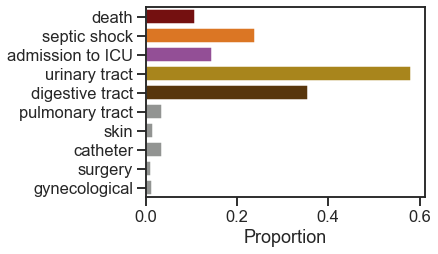

In [14]:
plt.figure(figsize=(5, 3.5))

sns.barplot(data=r,
            y='phenotype',
            x='value',
            palette=['#840000', '#f97306', '#9e43a2',
                     '#bf9005', '#653700'] + ['xkcd:grey'] * 5)

plt.xlabel('Proportion')
plt.ylabel('')

plt.savefig('phenotypes.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('phenotypes.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

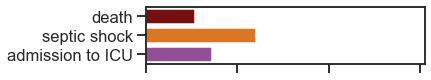

In [15]:
plt.figure(figsize=(5, 3 * 3.5 / 10))

sns.barplot(data=r[r['phenotype'].isin(['death',
                                        'septic shock',
                                        'admission to ICU',])],
            y='phenotype',
            x='value',
            palette=['#840000', '#f97306', '#9e43a2',
                     '#bf9005', '#653700'] + ['xkcd:grey'] * 5)

plt.xlabel('')
plt.ylabel('')

plt.xticks([0, 0.2, 0.4, 0.6],
           labels=[''] * 4)

plt.xlim(0, 0.61)

plt.savefig('phenotypes_1.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('phenotypes_1.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

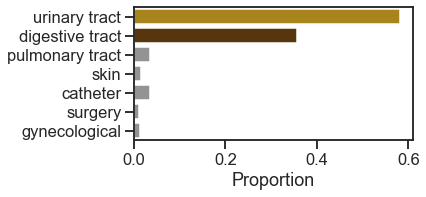

In [16]:
plt.figure(figsize=(5, 7 * 3.5 / 10))

sns.barplot(data=r[~r['phenotype'].isin(['death',
                                         'septic shock',
                                         'admission to ICU',])],
            y='phenotype',
            x='value',
            palette=['#bf9005', '#653700'] + ['xkcd:grey'] * 5)

plt.xlabel('Proportion')
plt.ylabel('')

plt.xticks([0, 0.2, 0.4, 0.6])

plt.xlim(0, 0.61)

plt.savefig('phenotypes_2.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('phenotypes_2.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [17]:
dpheno = {'code_rangement': 'sample name',
          'deces': 'death',
          'choc': 'septic shock',
          'passage_en_rea': 'admission to ICU',
          'pe_urinaire': 'urinary tract',
          'pe_digestive': 'digestive tract',
          'pe_pulmonaire': 'pulmonary tract',
          'pe_cutanee': 'skin',
          'pe_kt': 'catheter',
          'pe_chir': 'surgery',
          'pe_gyneco': 'gynecological',
          'atcd_bacteriemie': 'previous bacteremia',
          'ethylisme': 'chronic alcoholism',
          'tabac': 'active smoking',
          'immuno': 'immunosuppression',
          'cirrhose': 'cirrhosis',
          'ins_cardiaque': 'congestive heart failure',
          'ins_respi_chrnq': 'chronic pulmonary failure',
          'ins_renale_chrnq': 'chronic renal failure',
          'diabete': 'diabetes',
          'vih': 'HIV',
          'atcd_tumeur': 'malignant tumor',
          'atcd_hemopathie': 'lymphome',
          'appropriate_antibiotic': 'antibiotics given <48 hours after onset',
          'female': 'gender female',
          'community': 'community aquired infection',
          'plurimicrobial': 'plurimicrobial infection',
          'septicoli': 'study: septicoli'
         }

In [18]:
m_i = pd.read_csv('../out/associations/inputs/phenotypes.tsv', sep='\t')
m_i = m_i.rename(columns=dpheno)
m_o = pd.read_csv('../out/clinical_full.tsv', sep='\t')
m_o = m_o.rename(columns=dpheno)

In [19]:
m_o = m_o.set_index('sample name').loc[m_i['sample name']].reset_index()

In [20]:
m_i.shape

(912, 29)

In [21]:
m_o.shape

(912, 29)

In [22]:
m_o_s = m_o.describe()

In [23]:
m_i_s = m_i.describe()

In [24]:
m_o_s = m_o_s.T
m_o_s['count'] = m_o_s['count'].astype(int)

In [25]:
m_i_s = m_i_s.T
m_i_s['count'] = m_i_s['count'].astype(int)

In [26]:
m_o_s.to_csv('original_data_summary.tsv', sep='\t')

In [27]:
m_i_s.to_csv('imputed_data_summary.tsv', sep='\t')

In [28]:
m_o.to_csv('original_data.tsv', sep='\t', index=False)
m_i.to_csv('imputed_data.tsv', sep='\t', index=False)

In [29]:
order = [
 'urinary tract',
 'digestive tract',
 'pulmonary tract',
 'skin',
 'catheter',
 'surgery',
 'gynecological',
    
 'active smoking',
 'age',
 'antibiotics given <48 hours after onset',
 'chronic alcoholism',
 'chronic pulmonary failure',
 'chronic renal failure',
 'cirrhosis',
 'community aquired infection',
 'congestive heart failure',
 'diabetes',
 'gender female',
 'immunosuppression',
 'lymphome',
 'plurimicrobial infection',
 'previous bacteremia',
 'malignant tumor',
 'HIV',
]

In [30]:
order_studies = [
 'urinary tract',
 'digestive tract',
 'pulmonary tract',
 'skin',
 'catheter',
 'surgery',
 'gynecological',
    
 'active smoking',
 'age',
 'antibiotics given <48 hours after onset',
 'chronic alcoholism',
 'chronic pulmonary failure',
 'chronic renal failure',
 'cirrhosis',
 'community aquired infection',
 'congestive heart failure',
 'diabetes',
 'gender female',
 'immunosuppression',
 'lymphome',
 'plurimicrobial infection',
 'previous bacteremia',
 'malignant tumor',
 'HIV'
]

In [31]:
order_alt = [
 'death',
 'septic shock',
 'admission to ICU',
 
 'urinary tract',
 'digestive tract',
 'pulmonary tract',
 'skin',
 'catheter',
 'surgery',
 'gynecological',
    
 'active smoking',
 'antibiotics given <48 hours after onset',
 'chronic alcoholism',
 'chronic pulmonary failure',
 'chronic renal failure',
 'cirrhosis',
 'community aquired infection',
 'congestive heart failure',
 'diabetes',
 'gender female',
 'immunosuppression',
 'lymphome',
 'plurimicrobial infection',
 'previous bacteremia',
 'malignant tumor',
 'HIV',
]

In [32]:
m = pd.read_csv('../out/associations/inputs/phenotypes.tsv', sep='\t', index_col=0)
samples = m.index

In [33]:
m.shape

(912, 28)

In [34]:
m = m.rename(columns=dpheno)
m = m.rename(columns={'study: septicoli': 'septicoli'})

In [35]:
r = (m.groupby('septicoli').sum() / m.groupby('septicoli').count()).reset_index()
r = r.melt(id_vars='septicoli')

In [36]:
r['dataset'] = ['Septicoli' if x == 1
                else 'Colibafi'
                for x in r['septicoli'].values]

In [37]:
rd = (m.groupby('septicoli').sum() / m.groupby('septicoli').count()).T
rd['delta'] = rd[1] - rd[0]
rd['delta%'] = (rd[1] - rd[0]) / rd[1]

In [38]:
m.groupby('septicoli')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
septicoli,,,,,,,,
0,367.0,63.904632,18.631138,18.0,52.0,67.0,79.0,101.0
1,545.0,68.489908,16.454382,20.0,60.0,69.0,81.0,107.0


In [39]:
m.groupby('septicoli')['age'].median()

septicoli
0    67
1    69
Name: age, dtype: int64

In [40]:
rd.sort_values(1, ascending=False).head(10)

septicoli,0,1,delta,delta%
age,63.904632,68.489908,4.585276,0.066948
antibiotics given <48 hours after onset,1.000000,0.818349,-0.181651,-0.221973
community aquired infection,0.757493,0.543119,-0.214374,-0.394709
urinary tract,0.675749,0.519266,-0.156483,-0.301355
gender female,0.585831,0.475229,-0.110602,-0.232733
digestive tract,0.264305,0.418349,0.154043,0.368218
malignant tumor,0.272480,0.348624,0.076144,0.218414
septic shock,0.114441,0.324771,0.210329,0.647624
immunosuppression,0.397820,0.269725,-0.128095,-0.474911
diabetes,0.226158,0.236697,0.010539,0.044526


In [41]:
rd.sort_values('delta', ascending=False).head(10)

septicoli,0,1,delta,delta%
age,63.904632,68.489908,4.585276,0.066948
septic shock,0.114441,0.324771,0.210329,0.647624
digestive tract,0.264305,0.418349,0.154043,0.368218
malignant tumor,0.272480,0.348624,0.076144,0.218414
previous bacteremia,0.084469,0.148624,0.064155,0.431661
plurimicrobial infection,0.070845,0.128440,0.057596,0.448424
cirrhosis,0.059946,0.095413,0.035467,0.371725
admission to ICU,0.125341,0.159633,0.034292,0.214820
congestive heart failure,0.062670,0.093578,0.030908,0.330288
chronic renal failure,0.149864,0.174312,0.024448,0.140255


In [42]:
rd.sort_values('delta', ascending=False).tail(10)

septicoli,0,1,delta,delta%
death,0.125341,0.095413,-0.029928,-0.313666
HIV,0.040872,0.005505,-0.035367,-6.425068
chronic alcoholism,0.122616,0.073394,-0.049221,-0.670640
lymphome,0.076294,0.018349,-0.057946,-3.158038
gender female,0.585831,0.475229,-0.110602,-0.232733
active smoking,0.239782,0.128440,-0.111342,-0.866874
immunosuppression,0.397820,0.269725,-0.128095,-0.474911
urinary tract,0.675749,0.519266,-0.156483,-0.301355
antibiotics given <48 hours after onset,1.000000,0.818349,-0.181651,-0.221973
community aquired infection,0.757493,0.543119,-0.214374,-0.394709


In [43]:
r.head(6)

,septicoli,variable,value,dataset
0,0,septic shock,0.114441,Colibafi
1,1,septic shock,0.324771,Septicoli
2,0,admission to ICU,0.125341,Colibafi
3,1,admission to ICU,0.159633,Septicoli
4,0,death,0.125341,Colibafi
5,1,death,0.095413,Septicoli


In [44]:
r[r['variable'].isin(['urinary tract',
 'digestive tract',
 'pulmonary tract',
 'skin',
 'catheter',
 'surgery',
 'gynecological',])]

,septicoli,variable,value,dataset
32,0,urinary tract,0.675749,Colibafi
33,1,urinary tract,0.519266,Septicoli
34,0,digestive tract,0.264305,Colibafi
35,1,digestive tract,0.418349,Septicoli
36,0,pulmonary tract,0.035422,Colibafi
37,1,pulmonary tract,0.036697,Septicoli
38,0,skin,0.016349,Colibafi
39,1,skin,0.014679,Septicoli
40,0,catheter,0.024523,Colibafi
41,1,catheter,0.042202,Septicoli


In [45]:
r2 = m.groupby('septicoli').sum().reset_index()
r2 = r2.melt(id_vars='septicoli')

In [46]:
r2['dataset'] = ['Septicoli' if x == 1
                 else 'Colibafi'
                 for x in r2['septicoli'].values]

In [47]:
r2

,septicoli,variable,value,dataset
0,0,septic shock,42,Colibafi
1,1,septic shock,177,Septicoli
2,0,admission to ICU,46,Colibafi
3,1,admission to ICU,87,Septicoli
4,0,death,46,Colibafi
5,1,death,52,Septicoli
6,0,age,23453,Colibafi
7,1,age,37327,Septicoli
8,0,previous bacteremia,31,Colibafi
9,1,previous bacteremia,81,Septicoli


In [48]:
r1 = r[r['variable'] != 'age'].pivot_table(columns='dataset',
                   index='variable',
                   values='value')

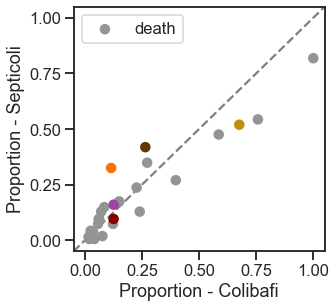

In [49]:
plt.figure(figsize=(4.5, 4.5))

colors = ['#840000', '#f97306', '#9e43a2',
          '#bf9005', '#653700'] + ['xkcd:grey'] * 21

plt.scatter(r1.loc[order_alt[::-1], 'Colibafi'],
            r1.loc[order_alt[::-1], 'Septicoli'],
            c=colors[::-1],
            label='death')

plt.legend(facecolor='w')

plt.plot([-0.05, 1.05], [-0.05, 1.05],
         '--', color='grey',
         zorder=0)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.xticks([0, .25, .5, .75, 1.])
plt.yticks([0, .25, .5, .75, 1.])

plt.xlabel('Proportion - Colibafi')
plt.ylabel('Proportion - Septicoli')

plt.savefig('prevalence_compare.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('prevalence_compare.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [50]:
n = m.copy()
n['dataset'] = ['Septicoli' if x == 1
                else 'Colibafi'
                for x in n['septicoli'].values]

In [51]:
n = n.melt(id_vars=['dataset'])

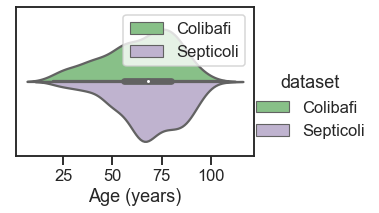

In [52]:
sns.catplot(data=n[n['variable'] == 'age'],
            kind='violin', notch=True,
            x='value', y='variable',
            hue='dataset',
            split=True,
            height=3, aspect=1.5,
            hue_order=['Colibafi', 'Septicoli'],
            palette=['#7fc97f', '#beaed4'],
            clip=(18, 107))
plt.legend(facecolor='w')
plt.ylabel('')
plt.yticks([])
plt.xlabel('Age (years)')
plt.xticks([25, 50, 75, 100])
sns.despine(top=False, right=False)
plt.savefig('age_compare.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('age_compare.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

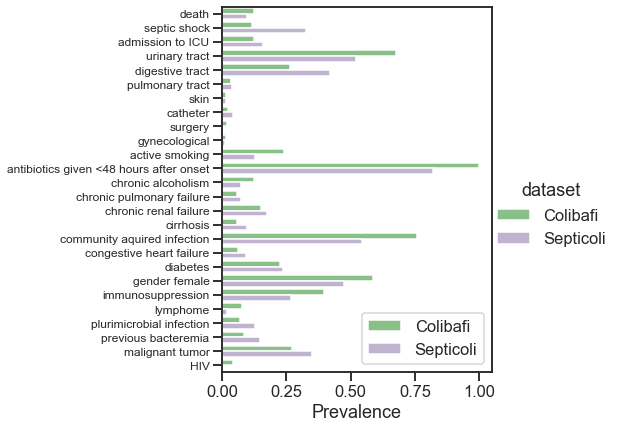

In [53]:
sns.catplot(data=r[r['variable'] != 'age'],
            kind='bar',
            x='value',
            y='variable',
            hue='dataset',
            height=6,
            aspect=1.5,
            order=order_alt,
            hue_order=['Colibafi', 'Septicoli'],
            palette=['#7fc97f', '#beaed4'])
plt.legend(facecolor='w')
plt.ylabel('')
plt.xlabel('Prevalence')
plt.yticks(size=12)
# plt.title('Imputed data')

sns.despine(top=False, right=False)

plt.savefig('data_imputed.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('data_imputed.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [54]:
m = pd.read_csv('../out/clinical_associations/univariate.tsv', sep='\t')
m['target'] = [dpheno.get(x, x) for x in m['target'].values]
m['variable'] = [dpheno.get(x, x) for x in m['variable'].values]

In [55]:
m[(m['pvalue'] < 0.01) &
  (m['dataset'] == 'full')].sort_values(['target', 'pvalue']).head(30)

,dataset,target,variable,odds-ratio,odds-ratio-lower,odds-ratio-higher,pvalue
149,full,admission to ICU,cirrhosis,1.992248,1.371733,2.893870,0.000298
160,full,admission to ICU,digestive tract,1.534235,1.182631,1.990319,0.001285
166,full,admission to ICU,active smoking,1.587535,1.168777,2.156961,0.003128
92,full,death,urinary tract,0.511964,0.377880,0.693996,0.000016
91,full,death,pulmonary tract,2.876124,1.699370,4.866889,0.000083
76,full,death,malignant tumor,1.751355,1.303147,2.353813,0.000206
88,full,death,digestive tract,1.514212,1.123500,2.040609,0.006409
80,full,death,chronic alcoholism,1.740068,1.162314,2.604488,0.007129
82,full,death,immunosuppression,1.497583,1.111879,2.016705,0.007821
94,full,death,active smoking,1.561562,1.114194,2.188587,0.009731


In [56]:
ff = open('table_1.tsv', 'w')
for vv in m[(m['pvalue'] < 0.01) &
            (m['dataset'] == 'full')].sort_values(['target', 'pvalue']).iterrows():
    ff.write(f"{vv[1]['target']}\t{vv[1]['variable']}\t{vv[1]['odds-ratio']:.2f} [{vv[1]['odds-ratio-lower']:.2f}-{vv[1]['odds-ratio-higher']:.2f}]\t{vv[1]['pvalue']:.2e}\n")
ff.close()

In [57]:
m[(m['pvalue'] < 0.01) &
  (m['dataset'] == 'septicoli')].sort_values(['target', 'pvalue']).head(30)

,dataset,target,variable,odds-ratio,odds-ratio-lower,odds-ratio-higher,pvalue
168,septicoli,admission to ICU,age,0.270644,0.117278,0.624598,0.002190
190,septicoli,admission to ICU,active smoking,1.853541,1.240567,2.770219,0.002597
173,septicoli,admission to ICU,cirrhosis,1.960736,1.257885,3.056753,0.002946
115,septicoli,death,pulmonary tract,3.359122,1.717131,6.570486,0.000403
116,septicoli,death,urinary tract,0.579800,0.383155,0.877822,0.009970


In [58]:
m[(m['pvalue'] < 0.01) &
  (m['dataset'] == 'colibafi')].sort_values(['target', 'pvalue']).head(30)

,dataset,target,variable,odds-ratio,odds-ratio-lower,odds-ratio-higher,pvalue
212,colibafi,admission to ICU,urinary tract,0.480961,0.311219,0.743291,0.000981
140,colibafi,death,urinary tract,0.447789,0.289172,0.693515,0.000317
125,colibafi,death,cirrhosis,2.887149,1.513617,5.505982,0.001293
128,colibafi,death,chronic alcoholism,2.181014,1.296840,3.668016,0.003292
124,colibafi,death,malignant tumor,1.925371,1.241427,2.985557,0.003445
138,colibafi,death,catheter,3.469984,1.357545,8.870405,0.009351
63,colibafi,septic shock,skin,7.126597,2.148009,23.653799,0.001331


In [59]:
r = m[m['pvalue'] <= 0.1].pivot_table(index='variable',
                  columns=['target', 'dataset'],
                  values=['odds-ratio', 'odds-ratio-lower', 'odds-ratio-higher'])

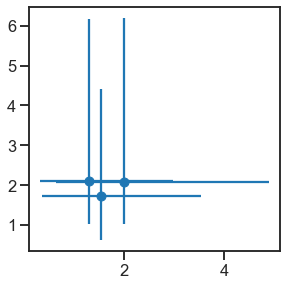

In [60]:
plt.figure(figsize=(4.5, 4.5))

plt.errorbar(r.loc[:, ('odds-ratio', 'admission to ICU', 'full')],
             r.loc[:, ('odds-ratio', 'admission to ICU', 'colibafi')],
             xerr=r.loc[:, (['odds-ratio-lower', 'odds-ratio-higher'], 'admission to ICU', 'full')].values.T,
             yerr=r.loc[:, (['odds-ratio-lower', 'odds-ratio-higher'], 'admission to ICU', 'colibafi')].values.T,
             fmt='o');

In [61]:
r = m[m['pvalue'] <= 0.1].pivot_table(index='variable',
                  columns=['target', 'dataset'],
                  values=['odds-ratio', 'odds-ratio-lower', 'odds-ratio-higher'])

In [62]:
target = 'death'

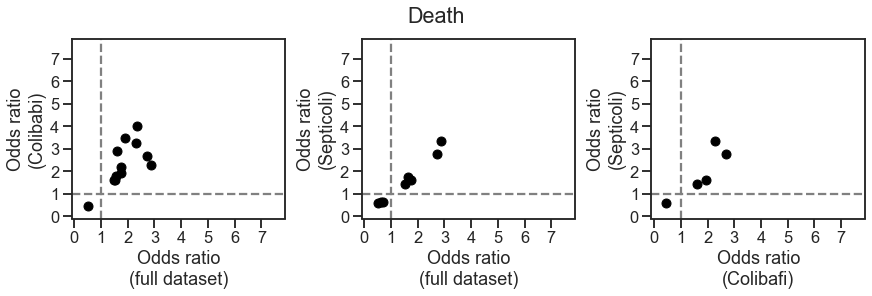

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4),
                        constrained_layout=True)

ax = axs[0]
ax.plot(r.loc[:, ('odds-ratio', target, 'full')],
        r.loc[:, ('odds-ratio', target, 'colibafi')],
        'ko')

ax.set_xlabel('Odds ratio\n(full dataset)')
ax.set_ylabel('Odds ratio\n(Colibabi)')

ax.set_xlim(-0.1, 7.9)
ax.set_ylim(-0.1, 7.9)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.axvline(1, ls='dashed', color='grey', zorder=0)
ax.axhline(1, ls='dashed', color='grey', zorder=0)

ax = axs[1]
ax.plot(r.loc[:, ('odds-ratio', target, 'full')],
        r.loc[:, ('odds-ratio', target, 'septicoli')],
        'ko')

ax.set_xlabel('Odds ratio\n(full dataset)')
ax.set_ylabel('Odds ratio\n(Septicoli)')

ax.set_xlim(-0.1, 7.9)
ax.set_ylim(-0.1, 7.9)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.axvline(1, ls='dashed', color='grey', zorder=0)
ax.axhline(1, ls='dashed', color='grey', zorder=0)

ax = axs[2]
ax.plot(r.loc[:, ('odds-ratio', target, 'colibafi')],
        r.loc[:, ('odds-ratio', target, 'septicoli')],
        'ko')

ax.set_xlabel('Odds ratio\n(Colibafi)')
ax.set_ylabel('Odds ratio\n(Septicoli)')

ax.set_xlim(-0.1, 7.9)
ax.set_ylim(-0.1, 7.9)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.axvline(1, ls='dashed', color='grey', zorder=0)
ax.axhline(1, ls='dashed', color='grey', zorder=0)

plt.suptitle('Death');

In [64]:
target = 'septic shock'

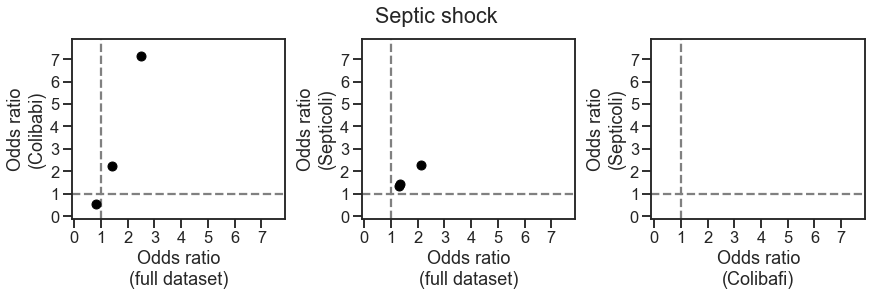

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4),
                        constrained_layout=True)

ax = axs[0]
ax.plot(r.loc[:, ('odds-ratio', target, 'full')],
        r.loc[:, ('odds-ratio', target, 'colibafi')],
        'ko')

ax.set_xlabel('Odds ratio\n(full dataset)')
ax.set_ylabel('Odds ratio\n(Colibabi)')

ax.set_xlim(-0.1, 7.9)
ax.set_ylim(-0.1, 7.9)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.axvline(1, ls='dashed', color='grey', zorder=0)
ax.axhline(1, ls='dashed', color='grey', zorder=0)

ax = axs[1]
ax.plot(r.loc[:, ('odds-ratio', target, 'full')],
        r.loc[:, ('odds-ratio', target, 'septicoli')],
        'ko')

ax.set_xlabel('Odds ratio\n(full dataset)')
ax.set_ylabel('Odds ratio\n(Septicoli)')

ax.set_xlim(-0.1, 7.9)
ax.set_ylim(-0.1, 7.9)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.axvline(1, ls='dashed', color='grey', zorder=0)
ax.axhline(1, ls='dashed', color='grey', zorder=0)

ax = axs[2]
ax.plot(r.loc[:, ('odds-ratio', target, 'colibafi')],
        r.loc[:, ('odds-ratio', target, 'septicoli')],
        'ko')

ax.set_xlabel('Odds ratio\n(Colibafi)')
ax.set_ylabel('Odds ratio\n(Septicoli)')

ax.set_xlim(-0.1, 7.9)
ax.set_ylim(-0.1, 7.9)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.axvline(1, ls='dashed', color='grey', zorder=0)
ax.axhline(1, ls='dashed', color='grey', zorder=0)

plt.suptitle('Septic shock');

In [66]:
target = 'admission to ICU'

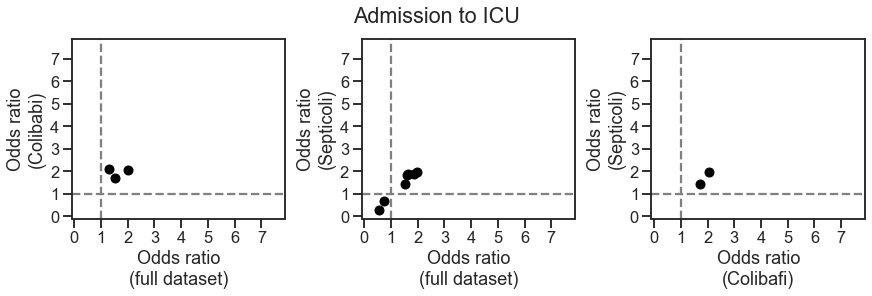

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4),
                        constrained_layout=True)

ax = axs[0]
ax.plot(r.loc[:, ('odds-ratio', target, 'full')],
        r.loc[:, ('odds-ratio', target, 'colibafi')],
        'ko')

ax.set_xlabel('Odds ratio\n(full dataset)')
ax.set_ylabel('Odds ratio\n(Colibabi)')

ax.set_xlim(-0.1, 7.9)
ax.set_ylim(-0.1, 7.9)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.axvline(1, ls='dashed', color='grey', zorder=0)
ax.axhline(1, ls='dashed', color='grey', zorder=0)

ax = axs[1]
ax.plot(r.loc[:, ('odds-ratio', target, 'full')],
        r.loc[:, ('odds-ratio', target, 'septicoli')],
        'ko')

ax.set_xlabel('Odds ratio\n(full dataset)')
ax.set_ylabel('Odds ratio\n(Septicoli)')

ax.set_xlim(-0.1, 7.9)
ax.set_ylim(-0.1, 7.9)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.axvline(1, ls='dashed', color='grey', zorder=0)
ax.axhline(1, ls='dashed', color='grey', zorder=0)

ax = axs[2]
ax.plot(r.loc[:, ('odds-ratio', target, 'colibafi')],
        r.loc[:, ('odds-ratio', target, 'septicoli')],
        'ko')

ax.set_xlabel('Odds ratio\n(Colibafi)')
ax.set_ylabel('Odds ratio\n(Septicoli)')

ax.set_xlim(-0.1, 7.9)
ax.set_ylim(-0.1, 7.9)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.axvline(1, ls='dashed', color='grey', zorder=0)
ax.axhline(1, ls='dashed', color='grey', zorder=0)

plt.suptitle('Admission to ICU');

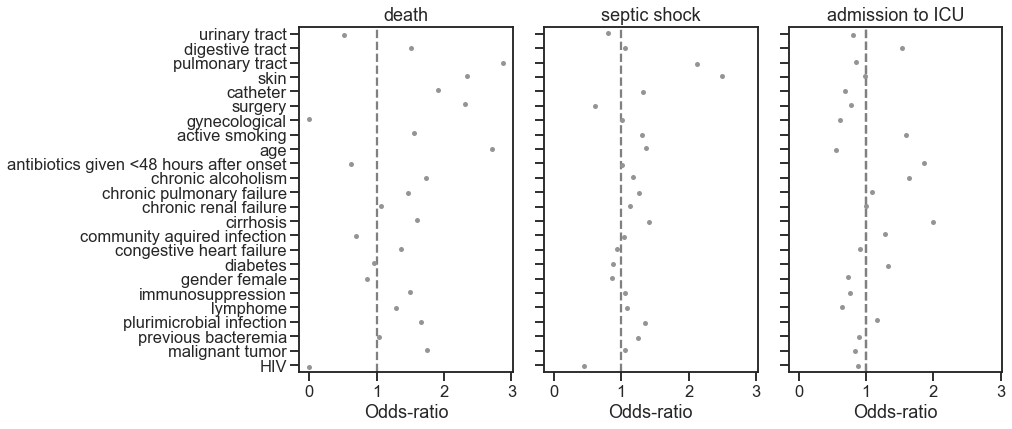

In [68]:
cp = sns.catplot(data=m[(m['dataset'] == 'full')],
                 dodge=True,
                 legend=None,
                 height=6,
                 aspect=0.8,
                 x='odds-ratio', y='variable',
                 col='target',
                 col_order=['death', 'septic shock', 'admission to ICU'],
                 color='xkcd:grey',
                 order=order)

cp.set_titles(col_template='{col_name}')
for ax in cp.axes_dict.values():
    ax.axvline(1, color='grey', ls='dashed', zorder=0)
cp.set_xlabels('Odds-ratio')
cp.set_ylabels('')
sns.despine(top=False,
            right=False)
plt.axvline(1, color='grey', ls='dashed', zorder=0)
plt.savefig('univariate_full.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('univariate_full.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

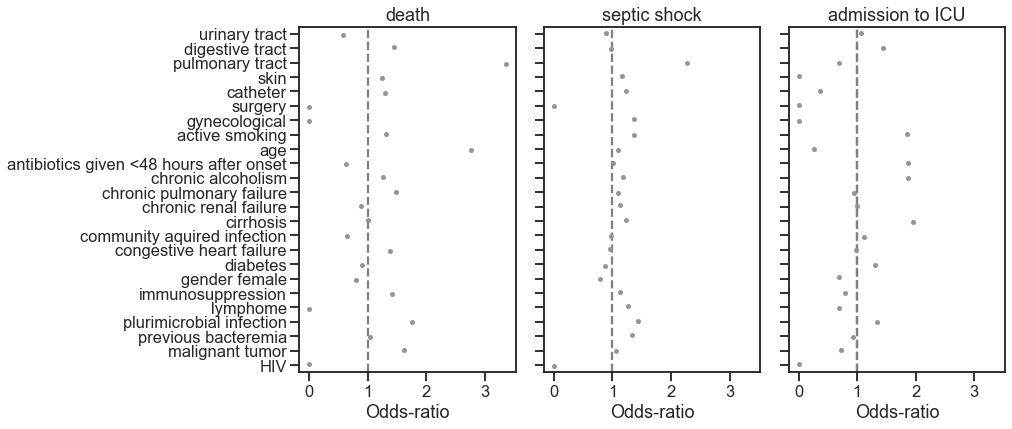

In [69]:
cp = sns.catplot(data=m[(m['dataset'] == 'septicoli')],
                 dodge=True,
                 legend=None,
                 height=6,
                 aspect=0.8,
                 x='odds-ratio', y='variable',
                 col='target',
                 col_order=['death', 'septic shock', 'admission to ICU'],
                 color='xkcd:grey',
                 order=order_studies)

cp.set_titles(col_template='{col_name}')
for ax in cp.axes_dict.values():
    ax.axvline(1, color='grey', ls='dashed', zorder=0)
cp.set_xlabels('Odds-ratio')
cp.set_ylabels('')
sns.despine(top=False,
            right=False)
plt.axvline(1, color='grey', ls='dashed', zorder=0)
plt.savefig('univariate_septicoli.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('univariate_septicoli.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

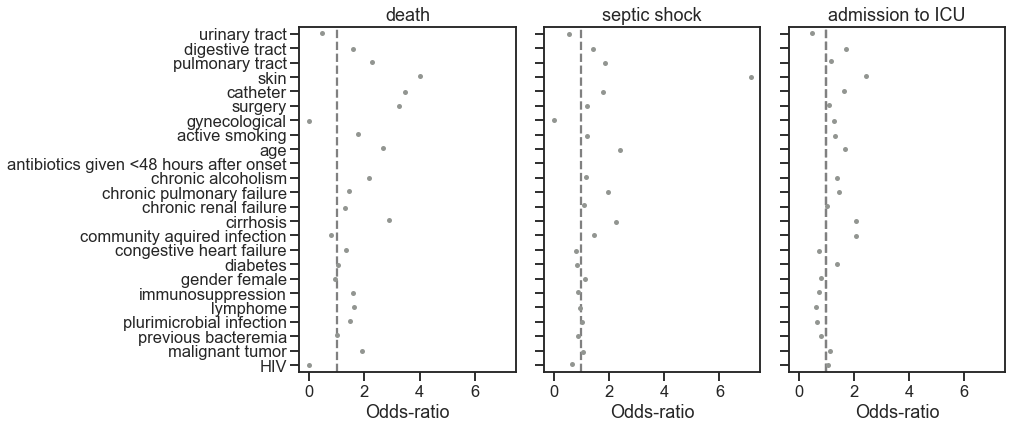

In [70]:
cp = sns.catplot(data=m[(m['dataset'] == 'colibafi')],
                 dodge=True,
                 legend=None,
                 height=6,
                 aspect=0.8,
                 x='odds-ratio', y='variable',
                 col='target',
                 col_order=['death', 'septic shock', 'admission to ICU'],
                 color='xkcd:grey',
                 order=order_studies)

cp.set_titles(col_template='{col_name}')
for ax in cp.axes_dict.values():
    ax.axvline(1, color='grey', ls='dashed', zorder=0)
cp.set_xlabels('Odds-ratio')
cp.set_ylabels('')
sns.despine(top=False,
            right=False)
plt.axvline(1, color='grey', ls='dashed', zorder=0)
plt.savefig('univariate_colibafi.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('univariate_colibafi.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [71]:
m = pd.read_csv('../out/clinical_associations/deces.multi.tsv', sep='\t')
m.columns = ['name', 'coef', 'std-err', 'zvalue', 'pvalue', 'coef-low', 'coef-high']

m['name'] = [dpheno.get(x, x) for x in m['name']]

m['odds-ratio'] = np.power(2, m['coef'])
m['odds-ratio-low'] = np.power(2, m['coef-low'])
m['odds-ratio-high'] = np.power(2, m['coef-high'])

In [72]:
m[m['pvalue'] < 0.01]

,name,coef,std-err,zvalue,pvalue,coef-low,coef-high,odds-ratio,odds-ratio-low,odds-ratio-high
0,(Intercept),-2.113236,0.588445,-3.591222,0.000329,-3.298112,-0.986206,0.231128,0.101665,0.504804
7,pulmonary tract,1.264993,0.419366,3.016441,0.002558,0.413588,2.070605,2.403261,1.331995,4.200628
8,urinary tract,-0.651732,0.246623,-2.642624,0.008227,-1.139888,-0.170682,0.636516,0.453795,0.888423
10,study: septicoli,-0.769180,0.254919,-3.017349,0.002550,-1.274761,-0.272747,0.586751,0.413294,0.827742


In [73]:
ff = open('table_2_a.tsv', 'w')
for vv in m[(m['pvalue'] < 0.01)].sort_values('pvalue').iterrows():
    ff.write(f"death\t{vv[1]['name']}\t{vv[1]['odds-ratio']:.2f} [{vv[1]['odds-ratio-low']:.2f}-{vv[1]['odds-ratio-high']:.2f}]\t{vv[1]['pvalue']:.2e}\n")
ff.close()

In [74]:
m = pd.read_csv('../out/clinical_associations/deces_colibafi.multi.tsv', sep='\t')
m.columns = ['name', 'coef', 'std-err', 'zvalue', 'pvalue', 'coef-low', 'coef-high']

m['name'] = [dpheno.get(x, x) for x in m['name']]

m['odds-ratio'] = np.power(2, m['coef'])
m['odds-ratio-low'] = np.power(2, m['coef-low'])
m['odds-ratio-high'] = np.power(2, m['coef-high'])

In [75]:
m[m['pvalue'] < 0.01]

,name,coef,std-err,zvalue,pvalue,coef-low,coef-high,odds-ratio,odds-ratio-low,odds-ratio-high
0,(Intercept),-3.582941,0.684531,-5.234151,1.657449e-07,-5.016363,-2.320130,0.083450,0.030898,0.200249
1,age,2.753713,1.002331,2.747309,6.008646e-03,0.872979,4.821296,6.744506,1.831441,28.271882
2,cirrhosis,1.894847,0.523238,3.621390,2.930242e-04,0.841554,2.916099,3.718826,1.791980,7.548022
4,skin,2.475867,0.901441,2.746565,6.022298e-03,0.645899,4.317002,5.563013,1.564714,19.931823


In [76]:
m = pd.read_csv('../out/clinical_associations/deces_septicoli.multi.tsv', sep='\t')
m.columns = ['name', 'coef', 'std-err', 'zvalue', 'pvalue', 'coef-low', 'coef-high']

m['name'] = [dpheno.get(x, x) for x in m['name']]

m['odds-ratio'] = np.power(2, m['coef'])
m['odds-ratio-low'] = np.power(2, m['coef-low'])
m['odds-ratio-high'] = np.power(2, m['coef-high'])

In [77]:
m[m['pvalue'] < 0.01]

,name,coef,std-err,zvalue,pvalue,coef-low,coef-high,odds-ratio,odds-ratio-low,odds-ratio-high
0,(Intercept),-2.818247,0.659990,-4.270134,0.000020,-4.174307,-1.578665,0.141783,0.055387,0.334792
5,pulmonary tract,1.893571,0.524855,3.607795,0.000309,0.818590,2.903740,3.715537,1.763681,7.483641


In [78]:
m = pd.read_csv('../out/clinical_associations/choc.multi.tsv', sep='\t')
m.columns = ['name', 'coef', 'std-err', 'zvalue', 'pvalue', 'coef-low', 'coef-high']

m['name'] = [dpheno.get(x, x) for x in m['name']]

m['odds-ratio'] = np.power(2, m['coef'])
m['odds-ratio-low'] = np.power(2, m['coef-low'])
m['odds-ratio-high'] = np.power(2, m['coef-high'])

In [79]:
ff = open('table_2_b.tsv', 'w')
for vv in m[(m['pvalue'] < 0.01)].sort_values('pvalue').iterrows():
    ff.write(f"septic shock\t{vv[1]['name']}\t{vv[1]['odds-ratio']:.2f} [{vv[1]['odds-ratio-low']:.2f}-{vv[1]['odds-ratio-high']:.2f}]\t{vv[1]['pvalue']:.2e}\n")
ff.close()

In [80]:
m[m['pvalue'] < 0.01]

,name,coef,std-err,zvalue,pvalue,coef-low,coef-high,odds-ratio,odds-ratio-low,odds-ratio-high
0,(Intercept),-2.293774,0.182943,-12.538159,4.615949e-36,-2.666995,-1.948387,0.203941,0.157454,0.259106
3,pulmonary tract,1.070897,0.378551,2.828942,4.670220e-03,0.317714,1.813419,2.100740,1.246354,3.514743
5,study: septicoli,1.345066,0.194383,6.919671,4.526924e-12,0.973284,1.736858,2.540418,1.963305,3.333084


In [81]:
m = pd.read_csv('../out/clinical_associations/choc_colibafi.multi.tsv', sep='\t')
m.columns = ['name', 'coef', 'std-err', 'zvalue', 'pvalue', 'coef-low', 'coef-high']

m['name'] = [dpheno.get(x, x) for x in m['name']]

m['odds-ratio'] = np.power(2, m['coef'])
m['odds-ratio-low'] = np.power(2, m['coef-low'])
m['odds-ratio-high'] = np.power(2, m['coef-high'])

In [82]:
m[m['pvalue'] < 0.01]

,name,coef,std-err,zvalue,pvalue,coef-low,coef-high,odds-ratio,odds-ratio-low,odds-ratio-high
0,(Intercept),-1.866913,0.271047,-6.887771,5.667322e-12,-2.430841,-1.362938,0.274160,0.185457,0.388790
3,skin,2.718737,0.913939,2.974745,2.932320e-03,0.982396,4.760697,6.582961,1.975744,27.108943


In [83]:
m = pd.read_csv('../out/clinical_associations/choc_septicoli.multi.tsv', sep='\t')
m.columns = ['name', 'coef', 'std-err', 'zvalue', 'pvalue', 'coef-low', 'coef-high']

m['name'] = [dpheno.get(x, x) for x in m['name']]

m['odds-ratio'] = np.power(2, m['coef'])
m['odds-ratio-low'] = np.power(2, m['coef-low'])
m['odds-ratio-high'] = np.power(2, m['coef-high'])

In [84]:
m[m['pvalue'] < 0.01]

,name,coef,std-err,zvalue,pvalue,coef-low,coef-high,odds-ratio,odds-ratio-low,odds-ratio-high
0,(Intercept),-1.005507,0.118862,-8.459414,2.687245e-17,-1.242708,-0.776253,0.498095,0.422579,0.583881
2,pulmonary tract,1.343145,0.470798,2.852913,4.332046e-03,0.432410,2.305854,2.537038,1.349486,4.944602


In [85]:
m = pd.read_csv('../out/clinical_associations/passage_en_rea.multi.tsv', sep='\t')
m.columns = ['name', 'coef', 'std-err', 'zvalue', 'pvalue', 'coef-low', 'coef-high']

m['name'] = [dpheno.get(x, x) for x in m['name']]

m['odds-ratio'] = np.power(2, m['coef'])
m['odds-ratio-low'] = np.power(2, m['coef-low'])
m['odds-ratio-high'] = np.power(2, m['coef-high'])

In [86]:
ff = open('table_2_c.tsv', 'w')
for vv in m[(m['pvalue'] < 0.01)].sort_values('pvalue').iterrows():
    ff.write(f"admission to ICU\t{vv[1]['name']}\t{vv[1]['odds-ratio']:.2f} [{vv[1]['odds-ratio-low']:.2f}-{vv[1]['odds-ratio-high']:.2f}]\t{vv[1]['pvalue']:.2e}\n")
ff.close()

In [87]:
m[m['pvalue'] < 0.01]

,name,coef,std-err,zvalue,pvalue,coef-low,coef-high,odds-ratio,odds-ratio-low,odds-ratio-high
0,(Intercept),-2.959796,0.572264,-5.172077,2.315067e-07,-4.12842,-1.875463,0.128532,0.057177,0.272539
8,digestive tract,0.652331,0.207278,3.147136,1.648782e-03,0.24580,1.059676,1.571706,1.185750,2.084463


In [88]:
m = pd.read_csv('../out/clinical_associations/passage_en_rea_colibafi.multi.tsv', sep='\t')
m.columns = ['name', 'coef', 'std-err', 'zvalue', 'pvalue', 'coef-low', 'coef-high']

m['name'] = [dpheno.get(x, x) for x in m['name']]

m['odds-ratio'] = np.power(2, m['coef'])
m['odds-ratio-low'] = np.power(2, m['coef-low'])
m['odds-ratio-high'] = np.power(2, m['coef-high'])

In [89]:
m[m['pvalue'] < 0.01]

,name,coef,std-err,zvalue,pvalue,coef-low,coef-high,odds-ratio,odds-ratio-low,odds-ratio-high
0,(Intercept),-2.343284,0.486941,-4.812256,0.000001,-3.429057,-1.482445,0.197061,0.092843,0.357882
3,urinary tract,-1.146087,0.328240,-3.491616,0.000480,-1.798857,-0.505641,0.451849,0.287402,0.704348


In [90]:
m = pd.read_csv('../out/clinical_associations/passage_en_rea_septicoli.multi.tsv', sep='\t')
m.columns = ['name', 'coef', 'std-err', 'zvalue', 'pvalue', 'coef-low', 'coef-high']

m['name'] = [dpheno.get(x, x) for x in m['name']]

m['odds-ratio'] = np.power(2, m['coef'])
m['odds-ratio-low'] = np.power(2, m['coef-low'])
m['odds-ratio-high'] = np.power(2, m['coef-high'])

In [91]:
m[m['pvalue'] < 0.01]

,name,coef,std-err,zvalue,pvalue,coef-low,coef-high,odds-ratio,odds-ratio-low,odds-ratio-high
0,(Intercept),-1.689517,0.568631,-2.971200,0.002966,-2.853534,-0.613271,0.310031,0.138357,0.653713
5,digestive tract,0.742950,0.259411,2.863989,0.004183,0.236945,1.256263,1.673595,1.178494,2.388762


In [92]:
m = pd.read_csv('../out/associations/inputs/phenotypes.tsv', sep='\t', index_col=0)
p = pd.read_csv('../out/poppunk.tsv', sep='\t', header=None, index_col=0)

In [93]:
j = m.join(p)

In [94]:
c = j.groupby(1)['deces'].count()
idx = c[c >= 5].index

In [95]:
(j[j[1].isin(idx)].groupby(1)['passage_en_rea'].sum() / j[j[1].isin(idx)].groupby(1)['passage_en_rea'].count()).sort_values()

1
100           0.000000
33            0.000000
29            0.000000
31            0.000000
92_118_264    0.000000
11            0.000000
54_320_638    0.076923
3             0.085470
13            0.090909
17            0.090909
20            0.095238
2             0.097561
183           0.100000
7_405         0.129032
19            0.142857
37            0.166667
4             0.182796
40_400_708    0.187500
53            0.200000
562_696       0.250000
80            0.272727
25            0.388889
12_70_1085    0.400000
63_77         0.428571
79            0.428571
Name: passage_en_rea, dtype: float64

In [96]:
j[j[1].isin(idx)].groupby([1, 'septicoli'])['passage_en_rea'].sum()

1           septicoli
100         0             0
            1             0
11          0             0
            1             0
12_70_1085  0             1
            1             1
13          0             2
            1             1
17          0             1
            1             2
183         0             1
            1             0
19          0             1
            1             0
2           0             3
            1             5
20          0             0
            1             2
25          0             3
            1             4
29          0             0
            1             0
3           0             3
            1             7
31          0             0
            1             0
33          0             0
            1             0
37          0             0
            1             1
4           0             7
            1            10
40_400_708  0             2
            1             1
53          0             

In [97]:
(j[j[1].isin(idx)].groupby([1, 'septicoli'])['passage_en_rea'].sum() / j[j[1].isin(idx)].groupby([1, 'septicoli'])['passage_en_rea'].count())

1           septicoli
100         0            0.000000
            1            0.000000
11          0            0.000000
            1            0.000000
12_70_1085  0            0.500000
            1            0.333333
13          0            0.125000
            1            0.058824
17          0            0.071429
            1            0.105263
183         0            0.200000
            1            0.000000
19          0            0.200000
            1            0.000000
2           0            0.157895
            1            0.079365
20          0            0.000000
            1            0.105263
25          0            0.600000
            1            0.307692
29          0            0.000000
            1            0.000000
3           0            0.060000
            1            0.104478
31          0            0.000000
            1            0.000000
33          0            0.000000
            1            0.000000
37          0            0

In [98]:
m = pd.read_csv('../out/associations/inputs/phenotypes.tsv', sep='\t', index_col=0)
p = pd.read_csv('../out/lineages.tsv', sep='\t', header=None, index_col=0)

In [99]:
j = m.join(p)

In [100]:
c = j.groupby(1)['deces'].count()
idx = c[c >= 5].index

In [101]:
(j[j[1].isin(idx)].groupby(1)['passage_en_rea'].sum() / j[j[1].isin(idx)].groupby(1)['passage_en_rea'].count()).sort_values()

1
E     0.125000
B2    0.130621
B1    0.132653
A     0.145833
D     0.159722
F     0.161290
C     0.196078
G     0.416667
Name: passage_en_rea, dtype: float64

In [102]:
j[j[1].isin(idx)].groupby([1, 'septicoli'])['passage_en_rea'].sum()

1   septicoli
A   0             5
    1             9
B1  0             4
    1             9
B2  0            20
    1            41
C   0             6
    1             4
D   0             8
    1            15
E   0             0
    1             1
F   0             1
    1             4
G   0             2
    1             3
Name: passage_en_rea, dtype: int64

In [103]:
(j[j[1].isin(idx)].groupby([1, 'septicoli'])['passage_en_rea'].sum() / j[j[1].isin(idx)].groupby([1, 'septicoli'])['passage_en_rea'].count())

1   septicoli
A   0            0.116279
    1            0.169811
B1  0            0.142857
    1            0.128571
B2  0            0.106383
    1            0.146953
C   0            0.222222
    1            0.166667
D   0            0.140351
    1            0.172414
E   0            0.000000
    1            0.250000
F   0            0.083333
    1            0.210526
G   0            0.333333
    1            0.500000
Name: passage_en_rea, dtype: float64

In [104]:
m = pd.read_csv('../data/GWAS_20201217_MEO.csv', sep=';')

In [105]:
(m.count() / m.shape[0]).sort_values()

transplantation            0.559211
neutropenie                0.561404
antibio                    0.597588
grossesse                  0.686404
bmi                        0.753289
lieu_pat2                  0.841009
pe_cutanee                 0.899123
pe_chir                    0.899123
pe_kt                      0.900219
pe_pulmonaire              0.903509
pe_digestive               0.915570
delai_atb                  0.928728
pe_urinaire                0.940789
localisation_secondaire    0.962719
atcd_bacteriemie           0.981360
tabac                      0.989035
age                        0.992325
passage_en_rea             0.994518
choc                       0.994518
ethylisme                  0.995614
deces                      0.997807
plurimicrobien             1.000000
atcd_hemopathie            1.000000
atcd_tumeur                1.000000
cirrhose                   1.000000
diabete                    1.000000
ins_renale_chrnq           1.000000
ins_respi_chrnq            1

In [106]:
m['localisation_secondaire'].unique()

array(['Non', 'Oui', nan], dtype=object)